In [13]:
import cv2
import imutils
# read the image
image = cv2.imread('phone.jpg')

In [14]:
# convert the image to grayscale format
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [15]:
# apply binary thresholding
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
# visualize the binary image
cv2.imshow('Binary image', thresh)
cv2.waitKey(0)
cv2.imwrite('image_thres1.jpg', thresh)
cv2.destroyAllWindows()

In [16]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
# draw contours on the original image
image_copy = image.copy()
M = cv2.moments(thresh)
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])
cv2.circle(image, (cX, cY), 5, (255, 255, 255), -1)
cv2.putText(image, "centroid", (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    
    
    
cv2.drawContours(image, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
#see the results
cv2.imshow('None approximation', image)
cv2.waitKey(0)
cv2.imwrite('contours_none_image1.jpg', image_copy)
cv2.destroyAllWindows()

In [1]:
# import the necessary packages
import argparse
import imutils
import cv2
images = cv2.imread("images.png")
gray = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

In [2]:
# find contours in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [4]:
# loop over the contours
for c in cnts:
    # compute the center of the contour
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    # draw the contour and center of the shape on the image
    cv2.drawContours(images, [c], -1, (0, 255, 0), 2)
    cv2.circle(images, (cX, cY), 7, (0, 0, 255), -1)
    cv2.putText(images, "center", (cX - 20, cY - 15),
        cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255), 2)
    # show the image
    cv2.imshow("Image", images)
    cv2.waitKey(0)

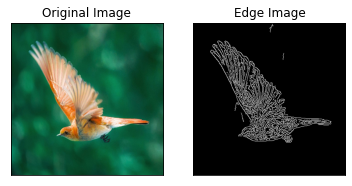

In [18]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('bird.jpg',1)
edges = cv.Canny(img,50,100)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()